In [1]:
close all;
clc;

s=tf('s');
Plant=1/((1+10*s)*(1+s)*(1+0.2*s));

%PLANT

t=0:0.01:30;
figure (1)
Gplant=Plant                        %Open Loop Transfer Function for Plant

Gplant =
 
                1
  -----------------------------
  2 s^3 + 12.2 s^2 + 11.2 s + 1
 
Continuous-time transfer function.
Model Properties


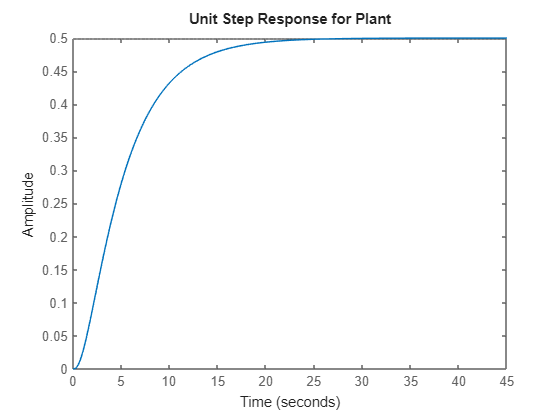

In [2]:
Hplant=feedback(Gplant,1);         %Closed Loop Transfer Function for Plant
step(Hplant)
title('Unit Step Response for Plant')

In [3]:
stepinfo(Hplant)

ans = struct with fields:
         RiseTime: 9.8655
    TransientTime: 18.0646
     SettlingTime: 18.0646
      SettlingMin: 0.4505
      SettlingMax: 0.5000
        Overshoot: 0
       Undershoot: 0
             Peak: 0.5000
         PeakTime: 47.2048

In [4]:
uPlant=ones(1,length(t));
[y,t]=lsim(Hplant, uPlant,t);
essPlant=uPlant(end)-y(end)                   %Steady State Error for Plant

essPlant = 0.5006

In [5]:

uPlantmax=1/(1+Gplant);
umax = stepinfo(uPlantmax);                        %Max Control Signal Output for Plant
umax.Peak

ans = 1

In [6]:

%P CONTROLLER

t=0:0.01:20;
figure(2)
GPinitial=Plant;

[mag, phase, w]=bode(GPinitial);
gain_margin_P=margin(mag, phase-60, w);
kcp=gain_margin_P

kcp = 7.5158

In [7]:

GCP=kcp;                                                   %Controller for P
GP=kcp*GPinitial                         %Open Loop Transfer Function for P

GP =
 
              7.516
  -----------------------------
  2 s^3 + 12.2 s^2 + 11.2 s + 1
 
Continuous-time transfer function.
Model Properties


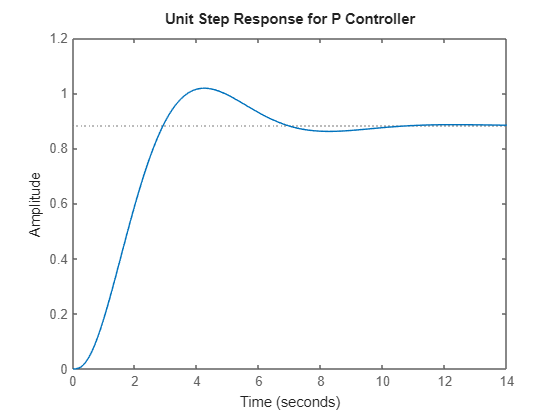

In [8]:
HP=feedback(GP,1);                     %Closed Loop Transfer Function for P
step(HP)
    title('Unit Step Response for P Controller')

In [9]:
    stepinfo(HP)

ans = struct with fields:
         RiseTime: 1.8654
    TransientTime: 8.9751
     SettlingTime: 8.9751
      SettlingMin: 0.8020
      SettlingMax: 1.0180
        Overshoot: 15.3425
       Undershoot: 0
             Peak: 1.0180
         PeakTime: 4.1919

In [10]:
uP=ones(1,length(t));
[y,t]=lsim(HP, uP,t);
essP=uP(end)-y(end)                               %Steady State Error for P

essP = 0.1174

In [11]:

uPmax=GCP/(1+GP);
umax = stepinfo(uPmax);                        %Max Control Signal Output for P
umax.Peak

ans = 7.5158

In [12]:

%PI CONTROLLER

t=0:0.01:15;
figure(3)
GPIinitial=Plant*(1+10*s)/s;

[mag, phase, w]=bode(GPIinitial);
gain_margin_PI=margin(mag, phase-60, w);
kcpi=gain_margin_PI

kcpi = 0.5088

In [13]:

GCPI=kcpi*(1+10*s)/s;                                     %Controller for PI
GPI=kcpi*GPIinitial                     %Open Loop Transfer Function for PI

GPI =
 
         5.088 s + 0.5088
  -------------------------------
  2 s^4 + 12.2 s^3 + 11.2 s^2 + s
 
Continuous-time transfer function.
Model Properties


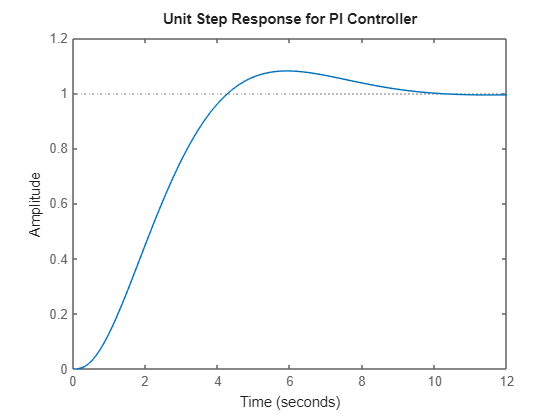

In [14]:
HPI=feedback(GPI,1);                  %Closed Loop Transfer Function for PI
step(HPI)
    title('Unit Step Response for PI Controller')

In [15]:
    stepinfo(HPI)

ans = struct with fields:
         RiseTime: 2.7486
    TransientTime: 8.6890
     SettlingTime: 8.6890
      SettlingMin: 0.9070
      SettlingMax: 1.0806
        Overshoot: 8.0570
       Undershoot: 0
             Peak: 1.0806
         PeakTime: 5.8650

In [16]:
uPI=ones(1,length(t));
[y,t]=lsim(HPI, uPI,t);
essPI=uPI(end)-y(end)                            %Steady State Error for PI

essPI = 7.0596e-04

In [17]:

uPImax=GCPI/(1+GPI);
umax = stepinfo(uPImax);                        %Max Control Signal Output for PI
umax.Peak

ans = 5.2102

In [18]:

%PD CONTROLLER

t=0:0.01:10;
figure(4)
GPDinitial=Plant*(1+s)/(1+0.1*s);

[mag, phase, w]=bode(GPDinitial);
gain_margin_PD=margin(mag, phase-60, w);
kcpd=gain_margin_PD

kcpd = 21.7764

In [19]:

GCPD=kcpd*(1+s)/(1+0.1*s);                                %Controller for PD
GPD=kcpd*GPDinitial                     %Open Loop Transfer Function for PD

GPD =
 
                21.78 s + 21.78
  -------------------------------------------
  0.2 s^4 + 3.22 s^3 + 13.32 s^2 + 11.3 s + 1
 
Continuous-time transfer function.
Model Properties


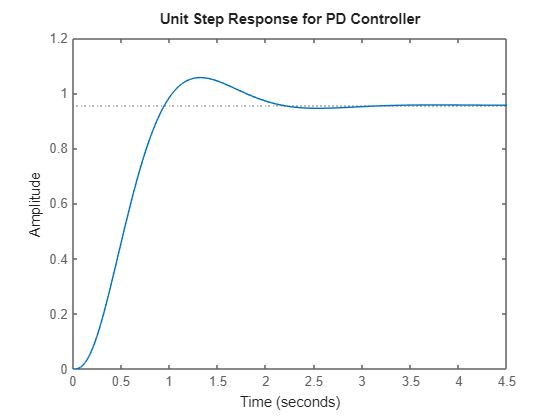

In [20]:
HPD=feedback(GPD,1);                  %Closed Loop Transfer Function for PD
step(HPD)
    title('Unit Step Response for PD Controller')

In [21]:
    stepinfo(HPD)

ans = struct with fields:
         RiseTime: 0.5981
    TransientTime: 1.9642
     SettlingTime: 1.9642
      SettlingMin: 0.8745
      SettlingMax: 1.0565
        Overshoot: 10.5005
       Undershoot: 0
             Peak: 1.0565
         PeakTime: 1.3221

In [22]:
uPD=ones(1,length(t));
[y,t]=lsim(HPD, uPD,t);
essPD=uPD(end)-y(end)                            %Steady State Error for PD

essPD = 0.0439

In [23]:

uPDmax=GCPD/(1+GPD);
umax = stepinfo(uPDmax)                        %Max Control Signal Output for PD

umax = struct with fields:
         RiseTime: 0
    TransientTime: 1.3393
     SettlingTime: NaN
      SettlingMin: -19.7572
      SettlingMax: 217.7635
        Overshoot: 2.2676e+04
       Undershoot: 2.0665e+03
             Peak: 217.7635
         PeakTime: 0

In [24]:
umax.Peak

ans = 217.7635

In [25]:

%PID CONTROLLER

t=0:0.01:10;
figure(5)
GPIDinitial=Plant*((1+10*s)*(1+s))/(s*(1+0.1*s));

[mag, phase, w]=bode(GPIDinitial);
gain_margin_PID=margin(mag, phase-60, w);
kcpid=gain_margin_PID

kcpid = 1.9408

In [26]:

GCPID=kcpid*((1+10*s)*(1+s))/(s*(1+0.1*s));              %Controller for PID
GPID=kcpid*GPIDinitial                 %Open Loop Transfer Function for PID

GPID =
 
           19.41 s^2 + 21.35 s + 1.941
  ---------------------------------------------
  0.2 s^5 + 3.22 s^4 + 13.32 s^3 + 11.3 s^2 + s
 
Continuous-time transfer function.
Model Properties


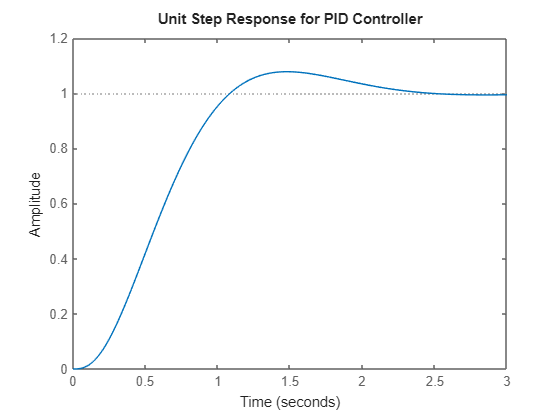

In [27]:
HPID=feedback(GPID,1);               %Closed Loop Transfer Function for PID
step(HPID)
    title('Unit Step Response for PID Controller')

In [28]:
    stepinfo(HPID)

ans = struct with fields:
         RiseTime: 0.6824
    TransientTime: 2.1397
     SettlingTime: 2.1397
      SettlingMin: 0.9074
      SettlingMax: 1.0778
        Overshoot: 7.7822
       Undershoot: 0
             Peak: 1.0778
         PeakTime: 1.4877

In [29]:
uPID=ones(1,length(t));
[y,t]=lsim(HPID, uPID,t);
essPID=uPID(end)-y(end)                         %Steady State Error for PID

essPID = -1.7331e-08

In [30]:

uPIDmax=GCPID/(1+GPID);
umax = stepinfo(uPIDmax);                        %Max Control Signal Output for PID
umax.Peak

ans = 194.0774




!!!EndOutputRegion!!!